In [4]:
#Dataset : http://cb.lk/covid_19

In [11]:
TRAIN_PATH = "CovidDataset/CovidDataset/Train"
VAL_PATH = "CovidDataset/CovidDataset/Test"

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [13]:
#CNN based model in Keras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [15]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [18]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [19]:
#Training the model
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

C:\Users\21austinw\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 77s 13s/step - loss: 1.1477 - accuracy: 0.5885 - val_loss: 0.6790 - val_accuracy: 0.5167
Epoch 2/10
5/5 [==============================] - 57s 12s/step - loss: 0.6764 - accuracy: 0.5135 - val_loss: 0.6772 - val_accuracy: 0.7000
Epoch 3/10
5/5 [==============================] - 57s 12s/step - loss: 0.5883 - accuracy: 0.7642 - val_loss: 0.4902 - val_accuracy: 0.9333
Epoch 4/10
5/5 [==============================] - 55s 12s/step - loss: 0.3548 - accuracy: 0.8173 - val_loss: 0.2924 - val_accuracy: 0.9167
Epoch 5/10
5/5 [==============================] - 56s 11s/step - loss: 0.3436 - accuracy: 0.8529 - val_loss: 0.2757 - val_accuracy: 0.9333
Epoch 6/10
5/5 [==============================] - 79s 15s/step - loss: 0.2270 - accuracy: 0.9006 - val_loss: 0.2055 - val_accuracy: 0.9167
Epoch 7/10
5/5 [==============================] - 64s 13s/step - loss: 0.2629 - accuracy: 0.9108 - val_loss: 0.2760 - val_accuracy: 0.9667
Epoch 8/10
5/5 [===========

In [20]:
#Getting summary
summary=hist.history
print(summary)

{'loss': [1.1733590364456177, 0.6727637052536011, 0.5631573796272278, 0.3312913477420807, 0.32244572043418884, 0.21284064650535583, 0.2770419418811798, 0.21227888762950897, 0.18184082210063934, 0.18659326434135437], 'accuracy': [0.59375, 0.5562499761581421, 0.7562500238418579, 0.84375, 0.875, 0.90625, 0.925000011920929, 0.918749988079071, 0.9437500238418579, 0.9437500238418579], 'val_loss': [0.6789721250534058, 0.6772452592849731, 0.4902306795120239, 0.2924056947231293, 0.2756947875022888, 0.20549799501895905, 0.2759804129600525, 0.08654802292585373, 0.175300732254982, 0.08863802254199982], 'val_accuracy': [0.5166666507720947, 0.699999988079071, 0.9333333373069763, 0.9166666865348816, 0.9333333373069763, 0.9166666865348816, 0.9666666388511658, 0.9833333492279053, 0.9666666388511658, 0.9833333492279053]}


In [21]:
model.save("model_covid.h5")

In [22]:
model.evaluate_generator(train_generator)

C:\Users\21austinw\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.12629057466983795, 0.9732142686843872]

In [23]:
print(model.evaluate_generator(validation_generator))

[0.08863802254199982, 0.9833333492279053]


In [24]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [25]:
y_actual, y_test = [],[]

In [27]:
for i in os.listdir("CovidDataset/CovidDataset/Val/Normal/"):
    img=image.load_img("CovidDataset/CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

C:\Users\21austinw\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
for i in os.listdir("CovidDataset/CovidDataset/Val/Covid/"):
    img=image.load_img("CovidDataset/CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [29]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

<AxesSubplot:>

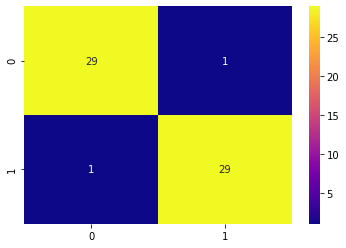

In [31]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal